In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import joblib
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
k11 = pd.read_csv("data\\Kharif\\Kharif11-12.csv")
k12 = pd.read_csv("data\\Kharif\\Kharif12-13.csv")
k13 = pd.read_csv("data\\Kharif\\Kharif13-14.csv")
k14 = pd.read_csv("data\\Kharif\\Kharif14-15.csv")
k15 = pd.read_csv("data\\Kharif\\Kharif15-16.csv")
k16 = pd.read_csv("data\\Kharif\\Kharif16-17.csv")
k17 = pd.read_csv("data\\Kharif\\Kharif17-18.csv")
k18 = pd.read_csv("data\\Kharif\\Kharif18-19.csv")
k19 = pd.read_csv("data\\Kharif\\Kharif19-20.csv")
k20 = pd.read_csv("data\\Kharif\\Kharif20-21.csv")
k21 = pd.read_csv("data\\Kharif\\kharif21-22.csv")

In [3]:
r11 = pd.read_csv("data\\Rabi\\Rabi11-12.csv")
r12 = pd.read_csv("data\\Rabi\\Rabi12-13.csv")
r13 = pd.read_csv("data\\Rabi\\Rabi13-14.csv")
r14 = pd.read_csv("data\\Rabi\\Rabi14-15.csv")
r15 = pd.read_csv("data\\Rabi\\Rabi15-16.csv")
r16 = pd.read_csv("data\\Rabi\\Rabi16-17.csv")
r17 = pd.read_csv("data\\Rabi\\Rabi17-18.csv")
r18 = pd.read_csv("data\\Rabi\\Rabi18-19.csv")
r19 = pd.read_csv("data\\Rabi\\Rabi19-20.csv")
r20 = pd.read_csv("data\\Rabi\\Rabi20-21.csv")
r21 = pd.read_csv("data\\Rabi\\Rabi21-22.csv")

In [4]:
#kharif
static_value = 'Kharif'
frames = [k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21]
df = pd.concat(frames, ignore_index=True)
df['Season'] = static_value
df

,DISTRICT,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season
0,AJMER,9921,4267,322,14510,Kharif
1,ALWAR,33097,12491,117,45705,Kharif
2,BANSWARA,19371,3337,244,22952,Kharif
3,BARAN,32303,10359,266,42928,Kharif
4,BARMER,6594,1159,91,7844,Kharif
...,...,...,...,...,...,...
358,S.MADHOPUR,10427,6000,468,16895,Kharif
359,SIKAR,9792,3258,81,13131,Kharif
360,SIROHI,4386,1535,247,6168,Kharif
361,TONK,12006,9826,373,22205,Kharif


In [5]:
sorted_df = df.sort_values(by='DISTRICT',ascending=True)
sorted_df = sorted_df.reset_index(drop=True)
sorted_df.head(2)

,DISTRICT,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season
0,AJMER,9921,4267,322,14510,Kharif
1,AJMER,5473,2890,39,8402,Kharif


In [6]:
#RABI
static_value2 = 'Rabi'
frames2 = [r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21]
df1 = pd.concat(frames2, ignore_index=True)
df1['Season'] = static_value2
df1

,DISTRICT,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season
0,AJMER,5856,3435,95,9387,Rabi
1,ALWAR,25396,9511,741,35649,Rabi
2,BANSWARA,16113,3241,142,19496,Rabi
3,BARAN,31524,14189,905,46618,Rabi
4,BARMER,7214,1585,86,8885,Rabi
...,...,...,...,...,...,...
358,S.MADHOPUR,21006,5023,132,26161,Rabi
359,SIKAR,14392,4863,205,19460,Rabi
360,SIROHI,7801,1341,183,9325,Rabi
361,TONK,19738,6770,353,26861,Rabi


In [7]:
sorted_df1 = df1.sort_values(by='DISTRICT',ascending=True)
sorted_df1 = sorted_df1.reset_index(drop=True)
sorted_df1

,DISTRICT,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season
0,AJMER,5856,3435,95,9387,Rabi
1,AJMER,8088,3474,10,11572,Rabi
2,AJMER,7754,3311,46,11111,Rabi
3,AJMER,10580,2991,17,13588,Rabi
4,AJMER,13756,3709,301,17766,Rabi
...,...,...,...,...,...,...
358,UDAIPUR,12086,1667,747,14500,Rabi
359,UDAIPUR,12922,3582,409,16914,Rabi
360,UDAIPUR,20802,4890,723,26415,Rabi
361,UDAIPUR,12366,4077,134,16577,Rabi


In [8]:
frames3 = [sorted_df,sorted_df1]
df_final = pd.concat(frames3, ignore_index=True)
df_final

,DISTRICT,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season
0,AJMER,9921,4267,322,14510,Kharif
1,AJMER,5473,2890,39,8402,Kharif
2,AJMER,8668,6979,158,15805,Kharif
3,AJMER,5080,3657,84,8821,Kharif
4,AJMER,5931,6072,289,12292,Kharif
...,...,...,...,...,...,...
721,UDAIPUR,12086,1667,747,14500,Rabi
722,UDAIPUR,12922,3582,409,16914,Rabi
723,UDAIPUR,20802,4890,723,26415,Rabi
724,UDAIPUR,12366,4077,134,16577,Rabi


In [9]:
df_final.describe()

,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL
count,726.000000,726.000000,726.000000,726.000000
mean,16716.157025,6018.256198,311.078512,23050.475207
std,11262.036828,4778.014645,383.400553,15588.589258
min,1789.000000,153.000000,0.000000,2093.000000
25%,8777.500000,2375.750000,71.250000,11918.750000
50%,14123.000000,4774.000000,169.500000,19529.000000
75%,21491.250000,8382.500000,406.000000,30205.250000
max,76483.000000,26756.000000,3069.000000,104447.000000


C:\Users\Pratyaksh singhal\AppData\Local\Temp\ipykernel_3000\4140759874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(),annot=True)


<AxesSubplot: >

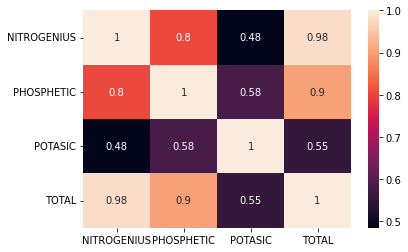

In [10]:
sns.heatmap(df_final.corr(),annot=True)

In [11]:
data_encoded = pd.get_dummies(df_final, columns=['Season'],drop_first=True)

In [12]:
data_encoded

,DISTRICT,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season_Rabi
0,AJMER,9921,4267,322,14510,0
1,AJMER,5473,2890,39,8402,0
2,AJMER,8668,6979,158,15805,0
3,AJMER,5080,3657,84,8821,0
4,AJMER,5931,6072,289,12292,0
...,...,...,...,...,...,...
721,UDAIPUR,12086,1667,747,14500,1
722,UDAIPUR,12922,3582,409,16914,1
723,UDAIPUR,20802,4890,723,26415,1
724,UDAIPUR,12366,4077,134,16577,1


In [13]:
data= pd.get_dummies(data_encoded, columns = ['DISTRICT'])


In [14]:
X_n = data.drop(['NITROGENIUS','TOTAL'],axis =1)
Y_n = data['NITROGENIUS']

In [15]:
X_p = data.drop(['PHOSPHETIC','TOTAL'],axis =1)
Y_p = data['PHOSPHETIC']

In [16]:
X_k = data.drop(['POTASIC','TOTAL'],axis =1)
Y_k = data['POTASIC']

data.head(5)

,NITROGENIUS,PHOSPHETIC,POTASIC,TOTAL,Season_Rabi,DISTRICT_AJMER,DISTRICT_ALWAR,DISTRICT_BANSWARA,DISTRICT_BARAN,DISTRICT_BARMER,...,DISTRICT_KOTA,DISTRICT_NAGAUR,DISTRICT_PALI,DISTRICT_PRATAPGARH,DISTRICT_RAJSAMAND,DISTRICT_S.MADHOPUR,DISTRICT_SIKAR,DISTRICT_SIROHI,DISTRICT_TONK,DISTRICT_UDAIPUR
0,9921,4267,322,14510,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5473,2890,39,8402,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8668,6979,158,15805,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5080,3657,84,8821,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5931,6072,289,12292,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, Y_n, test_size=0.30,random_state=42)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, Y_p, test_size=0.30,random_state=42)
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k, Y_k, test_size=0.30,random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
model_n = RandomForestRegressor()
model_n.fit(X_n_train, y_n_train)

model_p = RandomForestRegressor()
model_p.fit(X_p_train, y_p_train)

# Train model for potash
model_k = RandomForestRegressor()
model_k.fit(X_k_train, y_k_train)

RandomForestRegressor()

In [24]:
y_n_pred = model_n.predict(X_n_test)
mse_n = mean_squared_error(y_n_test, y_n_pred)

y_p_pred = model_p.predict(X_p_test)
mse_p = mean_squared_error(y_p_test, y_p_pred)

y_k_pred = model_k.predict(X_k_test)
mse_k = mean_squared_error(y_k_test, y_k_pred)


['model_k.pkl']

In [26]:
print(f'MSE for Nitrogen: {mse_n}')
print(f'MSE for Phosphorus: {mse_p}')
print(f'MSE for Potash: {mse_k}')

MSE for Nitrogen: 28944650.998124316
MSE for Phosphorus: 3539914.2646977063
MSE for Potash: 71396.48165366972


In [39]:
from sklearn.metrics import r2_score

r2_n_rf = r2_score(y_n_test, y_n_pred)

# Calculate R2 score for phosphorus model
r2_p_rf = r2_score(y_p_test, y_p_pred)

# Calculate R2 score for potash model
r2_k_rf = r2_score(y_k_test, y_k_pred)

print(f'R2 score for Nitrogen: {r2_n_rf}')
print(f'R2 score for Phosphorus: {r2_p_rf}')
print(f'R2 score for Potash: {r2_k_rf}')

R2 score for Nitrogen: 0.7980491450065528
R2 score for Phosphorus: 0.8530326934408665
R2 score for Potash: 0.5671970892114382


In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [29]:
grid_search_n = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_n.fit(X_n_train, y_n_train)

best_params_n = grid_search_n.best_params_
best_score_n = grid_search_n.best_score_

print(f'\nBest Parameters (Random Forest - Nitrogen): {best_params_n}')
print(f'Best R2 Score (Random Forest - Nitrogen): {best_score_n}')


Best Parameters (Random Forest - Nitrogen): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R2 Score (Random Forest - Nitrogen): 0.7947990332107199


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

model_svr_n = GradientBoostingRegressor(random_state=42)
model_svr_n.fit(X_n_train, y_n_train)

model_svr_p = GradientBoostingRegressor(random_state=42)
model_svr_p.fit(X_p_train, y_p_train)

# Train model for potash
model_svr_k = GradientBoostingRegressor(random_state=42)
model_svr_k.fit(X_k_train, y_k_train)

joblib.dump(model_svr_n, 'model_gb_n.pkl')
joblib.dump(model_svr_p, 'model_gb_p.pkl')
joblib.dump(model_svr_k, 'model_gb_k.pkl')

['model_gb_k.pkl']

In [31]:
y_svr_n_pred = model_svr_n.predict(X_n_test)
mse_svr_n = mean_squared_error(y_n_test, y_svr_n_pred)

y_svr_p_pred = model_svr_p.predict(X_p_test)
mse_svr_p = mean_squared_error(y_p_test, y_svr_p_pred)

y_svr_k_pred = model_svr_k.predict(X_k_test)
mse_svr_k = mean_squared_error(y_k_test, y_svr_k_pred)

print(f'MSE for Nitrogen: {mse_svr_n}')
print(f'MSE for Phosphorus: {mse_svr_p}')
print(f'MSE for Potash: {mse_svr_k}')

MSE for Nitrogen: 27041565.936982423
MSE for Phosphorus: 3431876.7844152823
MSE for Potash: 73889.18891061908


In [40]:
from sklearn.metrics import r2_score

r2_n_svr = r2_score(y_n_test, y_svr_n_pred)

# Calculate R2 score for phosphorus model
r2_p_svr = r2_score(y_p_test, y_svr_p_pred)

# Calculate R2 score for potash model
r2_k_svr = r2_score(y_k_test, y_svr_k_pred)

print(f'R2 score for Nitrogen: {r2_n_svr}')
print(f'R2 score for Phosphorus: {r2_p_svr}')
print(f'R2 score for Potash: {r2_k_svr}')

R2 score for Nitrogen: 0.8113272341169644
R2 score for Phosphorus: 0.8575181064473025
R2 score for Potash: 0.5520863872333668


In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
model_knn_n = KNeighborsRegressor(n_neighbors=5)
model_knn_n.fit(X_n_train, y_n_train)

model_knn_p = KNeighborsRegressor(n_neighbors=5)
model_knn_p.fit(X_p_train, y_p_train)

# Train model for potash
model_knn_k = KNeighborsRegressor(n_neighbors=5)
model_knn_k.fit(X_k_train, y_k_train)

KNeighborsRegressor()

In [35]:
y_knn_n_pred = model_knn_n.predict(X_n_test)
mse_knn_n = mean_squared_error(y_n_test, y_knn_n_pred)

y_knn_p_pred = model_knn_p.predict(X_p_test)
mse_knn_p = mean_squared_error(y_p_test, y_knn_p_pred)

y_knn_k_pred = model_knn_k.predict(X_k_test)
mse_knn_k = mean_squared_error(y_k_test, y_knn_k_pred)

print(f'MSE for Nitrogen: {mse_knn_n}')
print(f'MSE for Phosphorus: {mse_knn_p}')
print(f'MSE for Potash: {mse_knn_k}')

MSE for Nitrogen: 57985775.44458715
MSE for Phosphorus: 8607091.65614679
MSE for Potash: 119421.6627522936


In [41]:

r2_n_knn = r2_score(y_n_test, y_knn_n_pred)

# Calculate R2 score for phosphorus model
r2_p_knn = r2_score(y_p_test, y_knn_p_pred)

# Calculate R2 score for potash model
r2_k_knn = r2_score(y_k_test, y_knn_k_pred)

print(f'R2 score for Nitrogen: {r2_n_knn}')
print(f'R2 score for Phosphorus: {r2_p_knn}')
print(f'R2 score for Potash: {r2_k_knn}')

R2 score for Nitrogen: 0.595425181348662
R2 score for Phosphorus: 0.6426577076664011
R2 score for Potash: 0.27607016405764284


In [44]:
import xgboost as xgb

In [45]:
model_n_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_n.fit(X_n_train, y_n_train)

model_p_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_p.fit(X_p_train, y_p_train)

model_k_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_k.fit(X_k_train, y_k_train)

RandomForestRegressor()

In [48]:
# Make predictions and evaluate
y_n_pred = model_n.predict(X_n_test)
y_p_pred = model_p.predict(X_p_test)
y_k_pred = model_k.predict(X_k_test)

# Calculate and print evaluation metrics
mse_n_xgb = mean_squared_error(y_n_test, y_n_pred)
mse_p_xgb = mean_squared_error(y_p_test, y_p_pred)
mse_k_xgb = mean_squared_error(y_k_test, y_k_pred)

r2_n_xgb = r2_score(y_n_test, y_n_pred)
r2_p_xgb = r2_score(y_p_test, y_p_pred)
r2_k_xgb = r2_score(y_k_test, y_k_pred)

print(f'MSE for Nitrogen: {mse_n}')
print(f'MSE for Phosphorus: {mse_p}')
print(f'MSE for Potash: {mse_k}')

print(f'R2 score for Nitrogen: {r2_n_xgb}')
print(f'R2 score for Phosphorus: {r2_p_xgb}')
print(f'R2 score for Potash: {r2_k_xgb}')

MSE for Nitrogen: 31373429.57659541
MSE for Phosphorus: 3528503.9988605506
MSE for Potash: 72277.60704954129
R2 score for Nitrogen: 0.7811032191239504
R2 score for Phosphorus: 0.8535064156589254
R2 score for Potash: 0.5618557386676843


In [37]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': XGBRegressor(random_state=42)
}

# Function to train and predict model
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Store the predictions
predictions_df = pd.DataFrame()

for model_name, model in models.items():
    # Nitrogen
    predictions_n = train_and_predict(model, X_n_train, y_n_train, X_n_test)
    predictions_df[f'{model_name}_Nitrogen'] = predictions_n
    # Phosphorus
    predictions_p = train_and_predict(model, X_p_train, y_p_train, X_p_test)
    predictions_df[f'{model_name}_Phosphorus'] = predictions_p
    # Potash
    predictions_k = train_and_predict(model, X_k_train, y_k_train, X_k_test)
    predictions_df[f'{model_name}_Potash'] = predictions_k

# Add true values for comparison
predictions_df['True_Nitrogen'] = y_n_test.values
predictions_df['True_Phosphorus'] = y_p_test.values
predictions_df['True_Potash'] = y_k_test.values

# Calculate and store MSE and R2 scores
results = []

for model_name in models.keys():
    mse_n = mean_squared_error(predictions_df['True_Nitrogen'], predictions_df[f'{model_name}_Nitrogen'])
    r2_n = r2_score(predictions_df['True_Nitrogen'], predictions_df[f'{model_name}_Nitrogen'])
    mse_p = mean_squared_error(predictions_df['True_Phosphorus'], predictions_df[f'{model_name}_Phosphorus'])
    r2_p = r2_score(predictions_df['True_Phosphorus'], predictions_df[f'{model_name}_Phosphorus'])
    mse_k = mean_squared_error(predictions_df['True_Potash'], predictions_df[f'{model_name}_Potash'])
    r2_k = r2_score(predictions_df['True_Potash'], predictions_df[f'{model_name}_Potash'])
    results.append([model_name, mse_n, r2_n, mse_p, r2_p, mse_k, r2_k])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'MSE_Nitrogen', 'R2_Nitrogen', 'MSE_Phosphorus', 'R2_Phosphorus', 'MSE_Potash', 'R2_Potash'])

# Print the results table
print(results_df)

# Display the prediction comparisons table
print(predictions_df.head())


               Model  MSE_Nitrogen  R2_Nitrogen  MSE_Phosphorus  \
0      Random Forest  2.979185e+07     0.792138    3.594131e+06   
1  Gradient Boosting  2.704157e+07     0.811327    3.431877e+06   
2                KNN  5.798578e+07     0.595425    8.607092e+06   
3            XGBoost  2.979404e+07     0.792123    3.590481e+06   

   R2_Phosphorus     MSE_Potash  R2_Potash  
0       0.850782   72605.719862   0.559867  
1       0.857518   73889.188911   0.552086  
2       0.642658  119421.662752   0.276070  
3       0.850933   77588.813405   0.529659  
   Random Forest_Nitrogen  Random Forest_Phosphorus  Random Forest_Potash  \
0                 9073.00                   2688.16                 66.41   
1                42853.24                  14198.88                574.51   
2                25646.60                   8570.97                482.94   
3                15950.89                  10565.21                285.74   
4                15716.37                   2889.87   

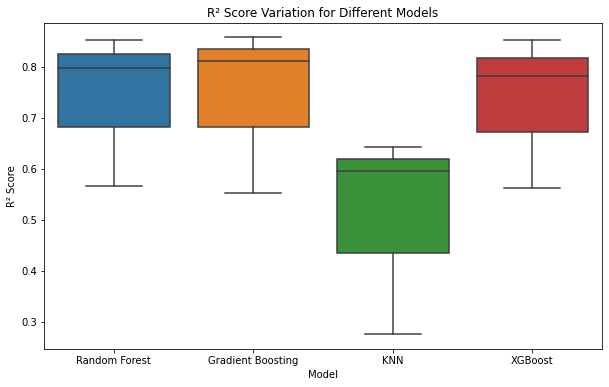

In [49]:
r2_scores = {
    'Random Forest': [r2_n_rf, r2_p_rf, r2_k_rf],
    'Gradient Boosting': [r2_n_svr, r2_p_svr, r2_k_svr],
    'KNN': [r2_n_knn, r2_p_knn, r2_k_knn],
    'XGBoost':[r2_n_xgb, r2_p_xgb, r2_k_xgb]

}

# Convert to DataFrame
r2_df = pd.DataFrame(r2_scores, index=['Nitrogen', 'Phosphorus', 'Potash'])

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=r2_df)
plt.title('R² Score Variation for Different Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()

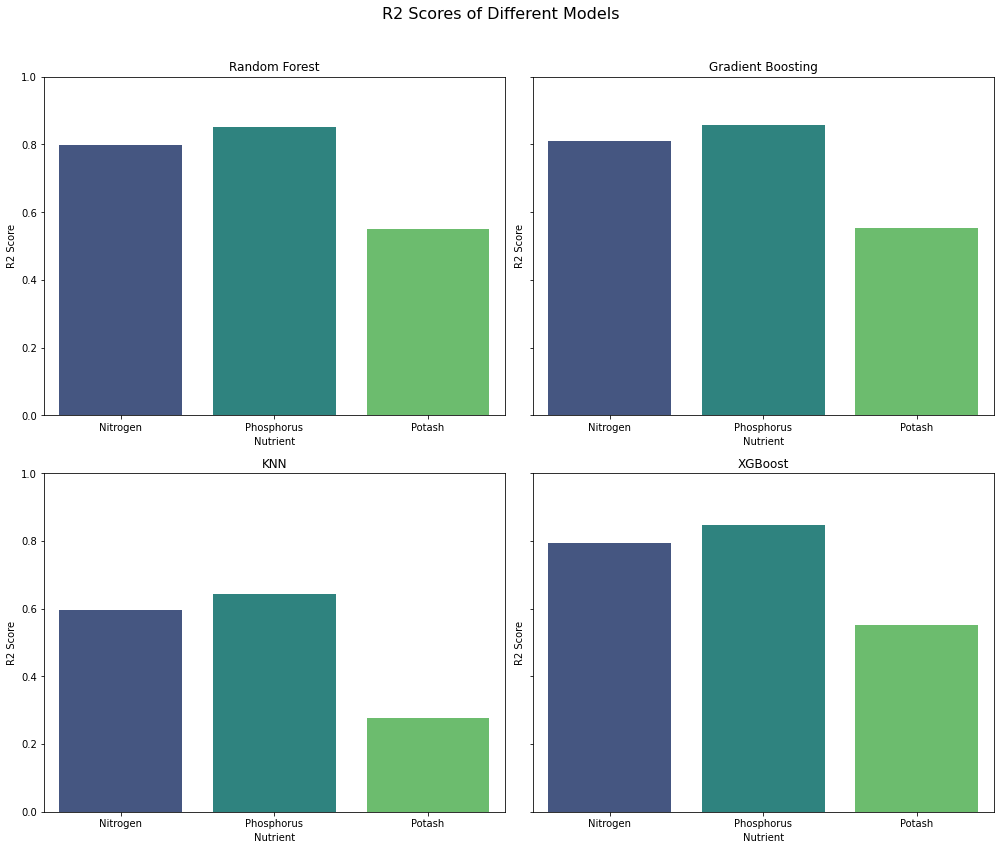

In [51]:
r2_scores = {
    'Random Forest': {'Nitrogen': r2_n_rf, 'Phosphorus': r2_p_rf, 'Potash': r2_k_rf},
    'Gradient Boosting': {'Nitrogen': r2_n_svr, 'Phosphorus': r2_p_svr, 'Potash': r2_k_svr},
    'KNN': {'Nitrogen': r2_n_knn, 'Phosphorus': r2_p_knn, 'Potash': r2_k_knn},
    'XGBoost': {'Nitrogen': r2_n_xgb, 'Phosphorus': r2_p_xgb, 'Potash': r2_k_xgb}
}

# Create subplots for each model type
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
fig.suptitle('R2 Scores of Different Models', fontsize=16)

# Define a list of model names for easy looping
models = ['Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost']
axes = axes.flatten()

for i, model in enumerate(models):
    scores = r2_scores[model]
    score_df = pd.DataFrame(list(scores.items()), columns=['Nutrient', 'R2 Score'])
    sns.barplot(x='Nutrient', y='R2 Score', data=score_df, ax=axes[i], palette='viridis')
    axes[i].set_title(model)
    axes[i].set_ylim(0, 1)  # Assuming R2 scores are between 0 and 1
    axes[i].set_xlabel('Nutrient')
    axes[i].set_ylabel('R2 Score')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

Random Forest - Nitrogen: Mean R2 = 0.5829663835328558, Std = 0.1004794418153161
Random Forest - Phosphorus: Mean R2 = 0.6623414690110507, Std = 0.09029622086685037
Random Forest - Potash: Mean R2 = 0.367296379998079, Std = 0.1544736492155746
Gradient Boosting - Nitrogen: Mean R2 = 0.662766458354851, Std = 0.08743681248530322
Gradient Boosting - Phosphorus: Mean R2 = 0.7191548745605456, Std = 0.07000407334976719
Gradient Boosting - Potash: Mean R2 = 0.32127088683962235, Std = 0.21175933023792393
KNN - Nitrogen: Mean R2 = 0.46782698039375725, Std = 0.13029491833759504
KNN - Phosphorus: Mean R2 = 0.4639421937217249, Std = 0.1505165792382802
KNN - Potash: Mean R2 = 0.10626528752535098, Std = 0.19380050378185618
XGBoost - Nitrogen: Mean R2 = 0.5643037916692156, Std = 0.12151983518146302
XGBoost - Phosphorus: Mean R2 = 0.6334294761331207, Std = 0.08693505186459115
XGBoost - Potash: Mean R2 = 0.20476363167891343, Std = 0.24111990007463377


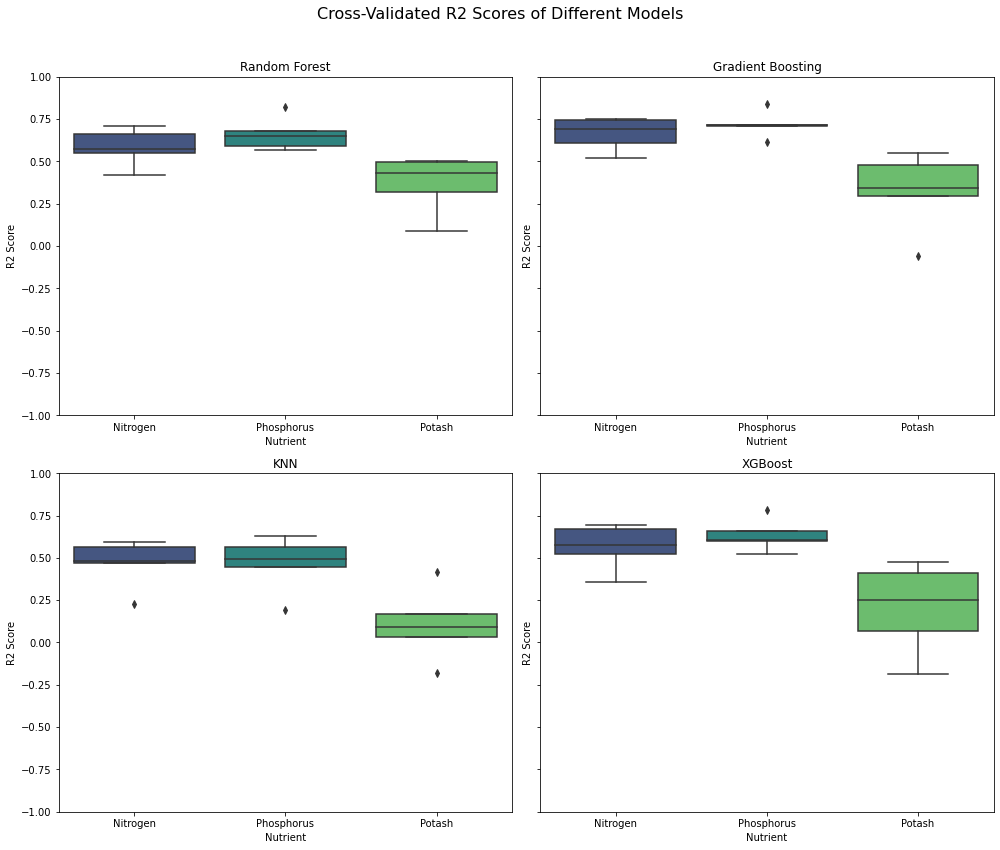

In [55]:
from sklearn.model_selection import cross_val_score
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Perform cross-validation and collect scores
cv_results = {}

for model_name, model in models.items():
    scores_n = cross_val_score(model, X_n, Y_n, cv=5, scoring='r2')
    scores_p = cross_val_score(model, X_p, Y_p, cv=5, scoring='r2')
    scores_k = cross_val_score(model, X_k, Y_k, cv=5, scoring='r2')
    
    cv_results[model_name] = {
        'Nitrogen': scores_n,
        'Phosphorus': scores_p,
        'Potash': scores_k
    }
    
    print(f'{model_name} - Nitrogen: Mean R2 = {np.mean(scores_n)}, Std = {np.std(scores_n)}')
    print(f'{model_name} - Phosphorus: Mean R2 = {np.mean(scores_p)}, Std = {np.std(scores_p)}')
    print(f'{model_name} - Potash: Mean R2 = {np.mean(scores_k)}, Std = {np.std(scores_k)}')

# Plot the R2 scores for each model and nutrient
nutrients = ['Nitrogen', 'Phosphorus', 'Potash']

fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
fig.suptitle('Cross-Validated R2 Scores of Different Models', fontsize=16)

axes = axes.flatten()

for i, (model_name, scores) in enumerate(cv_results.items()):
    score_df = pd.DataFrame(scores)
    score_df = score_df.melt(var_name='Nutrient', value_name='R2 Score')
    sns.boxplot(x='Nutrient', y='R2 Score', data=score_df, ax=axes[i], palette='viridis')
    axes[i].set_title(model_name)
    axes[i].set_ylim(-1, 1)  # Assuming R2 scores are between -1 and 1
    axes[i].set_xlabel('Nutrient')
    axes[i].set_ylabel('R2 Score')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

In [58]:
X = data.drop(['NITROGENIUS', 'PHOSPHETIC', 'POTASIC', 'TOTAL'], axis=1)
Y_n = data['NITROGENIUS']
Y_p = data['PHOSPHETIC']
Y_k = data['POTASIC']

# Split the data into training, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_n_train, y_n_temp = train_test_split(X, Y_n, test_size=0.4, random_state=42)
X_val, X_test, y_n_val, y_n_test = train_test_split(X_temp, y_n_temp, test_size=0.5, random_state=42)

X_train_p, X_temp_p, y_p_train, y_p_temp = train_test_split(X, Y_p, test_size=0.4, random_state=42)
X_val_p, X_test_p, y_p_val, y_p_test = train_test_split(X_temp_p, y_p_temp, test_size=0.5, random_state=42)

X_train_k, X_temp_k, y_k_train, y_k_temp = train_test_split(X, Y_k, test_size=0.4, random_state=42)
X_val_k, X_test_k, y_k_val, y_k_test = train_test_split(X_temp_k, y_k_temp, test_size=0.5, random_state=42)

# Train the model on the training set
model_n = GradientBoostingRegressor()
model_n.fit(X_train, y_n_train)

model_p = GradientBoostingRegressor()
model_p.fit(X_train_p, y_p_train)

model_k = GradientBoostingRegressor()
model_k.fit(X_train_k, y_k_train)

# Validate the model on the validation set
y_n_val_pred = model_n.predict(X_val)
mse_n_val = mean_squared_error(y_n_val, y_n_val_pred)
r2_n_val = r2_score(y_n_val, y_n_val_pred)

y_p_val_pred = model_p.predict(X_val_p)
mse_p_val = mean_squared_error(y_p_val, y_p_val_pred)
r2_p_val = r2_score(y_p_val, y_p_val_pred)

y_k_val_pred = model_k.predict(X_val_k)
mse_k_val = mean_squared_error(y_k_val, y_k_val_pred)
r2_k_val = r2_score(y_k_val, y_k_val_pred)

print(f'Validation MSE for Nitrogen: {mse_n_val}')
print(f'Validation R2 score for Nitrogen: {r2_n_val}')

print(f'Validation MSE for Phosphorus: {mse_p_val}')
print(f'Validation R2 score for Phosphorus: {r2_p_val}')

print(f'Validation MSE for Potash: {mse_k_val}')
print(f'Validation R2 score for Potash: {r2_k_val}')

# Evaluate the model on the test set
y_n_test_pred = model_n.predict(X_test)
mse_n_test = mean_squared_error(y_n_test, y_n_test_pred)
r2_n_test = r2_score(y_n_test, y_n_test_pred)

y_p_test_pred = model_p.predict(X_test_p)
mse_p_test = mean_squared_error(y_p_test, y_p_test_pred)
r2_p_test = r2_score(y_p_test, y_p_test_pred)

y_k_test_pred = model_k.predict(X_test_k)
mse_k_test = mean_squared_error(y_k_test, y_k_test_pred)
r2_k_test = r2_score(y_k_test, y_k_test_pred)

print(f'Test MSE for Nitrogen: {mse_n_test}')
print(f'Test R2 score for Nitrogen: {r2_n_test}')

print(f'Test MSE for Phosphorus: {mse_p_test}')
print(f'Test R2 score for Phosphorus: {r2_p_test}')

print(f'Test MSE for Potash: {mse_k_test}')
print(f'Test R2 score for Potash: {r2_k_test}')

Validation MSE for Nitrogen: 30778565.935527682
Validation R2 score for Nitrogen: 0.7824759998323315
Validation MSE for Phosphorus: 5461330.776943143
Validation R2 score for Phosphorus: 0.7374596326911289
Validation MSE for Potash: 59433.3745833373
Validation R2 score for Potash: 0.44671599574245424
Test MSE for Nitrogen: 53351593.42935133
Test R2 score for Nitrogen: 0.5582270318143119
Test MSE for Phosphorus: 10698159.188019441
Test R2 score for Phosphorus: 0.5921889793791193
Test MSE for Potash: 114698.38046315195
Test R2 score for Potash: 0.37826142520533
